#Create the environment


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In [3]:
import pandas as pd
import xarray as xr

import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

#Our class
from create_dataset.make_dataset import CustomDataset

#Load dataset

In [4]:
dataset = xr.open_dataset('Data/3_months_dataset_complete_for_model_CO.nc')
dataset

<xarray.Dataset>
Dimensions:            (latitude: 33, longitude: 33, time: 2233)
Coordinates:
  * time               (time) datetime64[ns] 2019-05-01 ... 2020-05-31T23:00:00
  * latitude           (latitude) float64 43.0 43.25 43.5 ... 50.5 50.75 51.0
  * longitude          (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
Data variables: (12/32)
    EMISSIONS          (latitude, longitude, time) float64 ...
    u10                (latitude, longitude, time) float64 ...
    v10                (latitude, longitude, time) float64 ...
    hcc                (latitude, longitude, time) float64 ...
    lcc                (latitude, longitude, time) float64 ...
    tcc                (latitude, longitude, time) float64 ...
    ...                 ...
    CO2_tc_add_trend   (latitude, longitude, time) float64 ...
    CH4_tc_add_trend   (latitude, longitude, time) float64 ...
    NO2_tc_add_trend   (latitude, longitude, time) float64 ...
    CO_tc_add_trend    (latitude, longitude, time) float64 ...
    O3_tc_add_trend    (latitude, longitude, time) float64 ...
    traffic            (latitude, longitude, time) float64 ...

In [75]:
dataframe = dataset.to_dataframe()
dataframe.shape

(2431737, 32)

#Dataset without traffic

In [76]:
dataset_notraffic = dataset
dataset_notraffic = dataset_notraffic.drop_vars('traffic')
dataset_notraffic

<xarray.Dataset>
Dimensions:            (latitude: 33, longitude: 33, time: 2233)
Coordinates:
  * time               (time) datetime64[ns] 2019-05-01 ... 2020-05-31T23:00:00
  * latitude           (latitude) float64 43.0 43.25 43.5 ... 50.5 50.75 51.0
  * longitude          (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
Data variables: (12/31)
    EMISSIONS          (latitude, longitude, time) float64 nan 1.606e-13 ... nan
    u10                (latitude, longitude, time) float64 2.632 2.961 ... nan
    v10                (latitude, longitude, time) float64 -5.72 -5.035 ... nan
    hcc                (latitude, longitude, time) float64 0.0 0.0 ... nan nan
    lcc                (latitude, longitude, time) float64 0.04311 ... nan
    tcc                (latitude, longitude, time) float64 0.04311 ... nan
    ...                 ...
    NO_tc_add_trend    (latitude, longitude, time) float64 nan nan ... nan nan
    CO2_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    CH4_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    NO2_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    CO_tc_add_trend    (latitude, longitude, time) float64 nan nan ... nan nan
    O3_tc_add_trend    (latitude, longitude, time) float64 nan nan ... nan nan

In [77]:
dataframe_notraffic = dataset_notraffic.to_dataframe()
dataframe_notraffic.shape

(2431737, 31)

##Save

In [78]:
dataset_notraffic.to_netcdf('Data/3_months_dataset_complete_for_model_CO_notraffic.nc', 'w', 'NETCDF4')

#No emission over 3sigma

In [39]:
dataset_3std = dataset
dataframe_3std = dataset_3std.to_dataframe()
dataframe_3std = dataframe_3std.reset_index()
dataframe_3std.head()

,latitude,longitude,time,EMISSIONS,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcw,tot_wind,tmp_shift_1,tot_wind_shift_12,rel_hum_shift_8,height,built,NO_tc,CO2_tc,CH4_tc,NO2_tc,CO_tc,O3_tc,NO_tc_add_trend,CO2_tc_add_trend,CH4_tc_add_trend,NO2_tc_add_trend,CO_tc_add_trend,O3_tc_add_trend,traffic
0,43.0,4.0,2019-05-01 00:00:00,NaN,2.632092,-5.720040,0.0,0.043108,0.043108,0.0,2.980232e-08,101590.312500,290.124512,0.007014,0.000219,15.114744,6.296568,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43.0,4.0,2019-05-01 01:00:00,1.605808e-13,2.960762,-5.035299,0.0,0.045595,0.046689,0.0,2.980232e-08,101555.247396,289.665548,0.007126,0.000227,14.682165,5.841263,290.124512,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43.0,4.0,2019-05-01 02:00:00,1.405082e-13,3.289431,-4.350558,0.0,0.048083,0.050270,0.0,2.980232e-08,101520.182292,289.206584,0.007239,0.000235,14.249586,5.454147,289.665548,NaN,NaN,0.0,0.0,4.242915e-07,412.077229,1872.138289,0.000005,0.001009,0.007920,0.000001,412.620326,1878.817495,0.000003,0.001065,0.007345,NaN
3,43.0,4.0,2019-05-01 03:00:00,1.354900e-13,3.618101,-3.665817,0.0,0.050570,0.053851,0.0,2.980232e-08,101485.117188,288.747620,0.007351,0.000243,13.817007,5.150618,289.206584,NaN,NaN,0.0,0.0,6.189903e-07,412.136477,1873.024578,0.000004,0.001010,0.007859,0.000001,412.588503,1878.369642,0.000003,0.001063,0.007345,NaN
4,43.0,4.0,2019-05-01 04:00:00,1.354900e-13,3.346790,-3.465523,0.0,0.035199,0.038485,0.0,2.980232e-08,101505.005208,288.495534,0.007411,0.000264,13.647179,4.817765,288.747620,NaN,NaN,0.0,0.0,8.136891e-07,412.195724,1873.910866,0.000004,0.001011,0.007797,0.000001,412.556680,1877.921788,0.000003,0.001062,0.007346,NaN


In [40]:
dataframe_3std.shape

(2431737, 35)

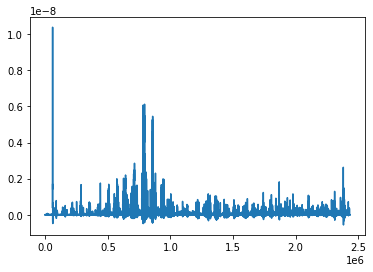

In [41]:
dataframe_3std.EMISSIONS.plot()

In [42]:
emissions = dataframe_3std.EMISSIONS

emissions_mean = emissions.mean()
emissions_stddev = emissions.std()

limit_max = emissions_mean + 3 * emissions_stddev
print(limit_max)
limit_min = emissions_mean - 3 * emissions_stddev
print(limit_min)

5.119497465566831e-10
-4.220593887087153e-10


In [43]:
dataframe_3std_correct = dataframe_3std

Substituted values: 53361


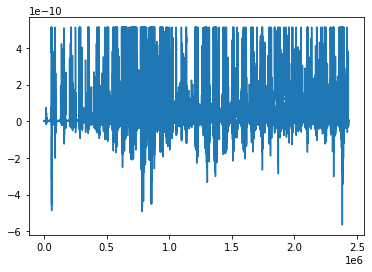

In [44]:
v = np.array(dataframe_3std.EMISSIONS.values.tolist())

print('Substituted values: ' + str(np.count_nonzero(np.isnan(v))))

dataframe_3std_correct.EMISSIONS = np.where(v > limit_max, limit_max, v).tolist()

dataframe_3std_correct.EMISSIONS.plot()

Substituted values: 53361


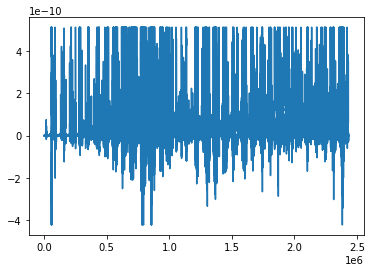

In [45]:
w = np.array(dataframe_3std.EMISSIONS.values.tolist())

print('Substituted values: ' + str(np.count_nonzero(np.isnan(w))))

dataframe_3std_correct.EMISSIONS = np.where(w < limit_min, limit_min, w).tolist()

dataframe_3std_correct.EMISSIONS.plot()

In [46]:
dataframe_3std_correct = dataframe_3std_correct.set_index(['latitude','longitude','time'])
dataframe_3std_correct.head()

EMISSIONS  ...  traffic
latitude longitude time                               ...         
43.0     4.0       2019-05-01 00:00:00           NaN  ...      NaN
                   2019-05-01 01:00:00  1.605808e-13  ...      NaN
                   2019-05-01 02:00:00  1.405082e-13  ...      NaN
                   2019-05-01 03:00:00  1.354900e-13  ...      NaN
                   2019-05-01 04:00:00  1.354900e-13  ...      NaN

[5 rows x 32 columns]

In [47]:
dataframe_3std_correct.shape

(2431737, 32)

In [49]:
dataset_3std_correct = dataframe_3std_correct.to_xarray()
dataset_3std_correct

<xarray.Dataset>
Dimensions:            (latitude: 33, longitude: 33, time: 2233)
Coordinates:
  * latitude           (latitude) float64 43.0 43.25 43.5 ... 50.5 50.75 51.0
  * longitude          (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * time               (time) datetime64[ns] 2019-05-01 ... 2020-05-31T23:00:00
Data variables: (12/32)
    EMISSIONS          (latitude, longitude, time) float64 nan 1.606e-13 ... nan
    u10                (latitude, longitude, time) float64 2.632 2.961 ... nan
    v10                (latitude, longitude, time) float64 -5.72 -5.035 ... nan
    hcc                (latitude, longitude, time) float64 0.0 0.0 ... nan nan
    lcc                (latitude, longitude, time) float64 0.04311 ... nan
    tcc                (latitude, longitude, time) float64 0.04311 ... nan
    ...                 ...
    CO2_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    CH4_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    NO2_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    CO_tc_add_trend    (latitude, longitude, time) float64 nan nan ... nan nan
    O3_tc_add_trend    (latitude, longitude, time) float64 nan nan ... nan nan
    traffic            (latitude, longitude, time) float64 nan nan ... nan nan

##Save

In [50]:
dataset_3std_correct.to_netcdf('Data/3_months_dataset_complete_for_model_CO_3std.nc', 'w', 'NETCDF4')

#No emission over 3sigma and no traffic

In [51]:
dataset_3std_notraffic = dataset_3std_correct.drop_vars('traffic')
dataset_3std_notraffic

<xarray.Dataset>
Dimensions:            (latitude: 33, longitude: 33, time: 2233)
Coordinates:
  * latitude           (latitude) float64 43.0 43.25 43.5 ... 50.5 50.75 51.0
  * longitude          (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * time               (time) datetime64[ns] 2019-05-01 ... 2020-05-31T23:00:00
Data variables: (12/31)
    EMISSIONS          (latitude, longitude, time) float64 nan 1.606e-13 ... nan
    u10                (latitude, longitude, time) float64 2.632 2.961 ... nan
    v10                (latitude, longitude, time) float64 -5.72 -5.035 ... nan
    hcc                (latitude, longitude, time) float64 0.0 0.0 ... nan nan
    lcc                (latitude, longitude, time) float64 0.04311 ... nan
    tcc                (latitude, longitude, time) float64 0.04311 ... nan
    ...                 ...
    NO_tc_add_trend    (latitude, longitude, time) float64 nan nan ... nan nan
    CO2_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    CH4_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    NO2_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    CO_tc_add_trend    (latitude, longitude, time) float64 nan nan ... nan nan
    O3_tc_add_trend    (latitude, longitude, time) float64 nan nan ... nan nan

In [52]:
dataframe_3std_notraffic = dataset_3std_notraffic.to_dataframe()
dataframe_3std_notraffic.shape

(2431737, 31)

##Save

In [53]:
dataset_3std_correct.to_netcdf('Data/3_months_dataset_complete_for_model_CO_notraffic_3std.nc', 'w', 'NETCDF4')